In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/hindi-sentence/data_sentence.csv


In [2]:
df = pd.read_csv("/kaggle/input/hindi-sentence/data_sentence.csv")

In [3]:
df.shape

(379092, 2)

In [4]:
df.sample()

,source,target
71833,इनका निर्माण राख धूल व असंगठित् पदार्थों से हो...,इनका निर्माण राख धूल व असंगठित पदार्थों से होत...


In [5]:
df = df.dropna()

In [6]:
df.shape

(379089, 2)

In [7]:
df.head()

,source,target
0,भूमंढलीय ऊस्मीकरण का अर्थ पृथ्वी की निकटस्थसतह...,भूमंडलीय ऊष्मीकरण का अर्थ पृथ्वी की निकटस्थसतह...
1,पृथ्वी की सतह के निकट विस्व की वायू के औसत् ता...,पृथ्वी की सतह के निकट विश्व की वायु के औसत ताप...
2,जलवायू परिवर्तन पर बैठे अंतरसरकार पैनल ने निस्...,जलवायु परिवर्तन पर बैठे अंतरसरकार पैनल ने निष्...
3,जैसा कि नाम से ही स्पस्ट है धरती के वातावरण के...,जैसा कि नाम से ही स्पष्ट है धरती के वातावरण के...
4,हमारी धरती सूरय की किरणों से उस्मा प्रराप्त् क...,हमारी धरती सूर्य की किरणों से उष्मा प्राप्त कर...


In [8]:
df['source_len'] = df['source'].apply(lambda x : len(x.split(" ")))

In [9]:
df = df[df['source_len'] <= 10]

In [10]:
df.shape

(71585, 3)

In [11]:
df.head()

,source,target,source_len
4,हमारी धरती सूरय की किरणों से उस्मा प्रराप्त् क...,हमारी धरती सूर्य की किरणों से उष्मा प्राप्त कर...,10
22,बाध्यता का कोयी भी प्ररभाव तात्कालिक् नहीं है,बाध्यता का कोई भी प्रभाव तात्कालिक नहीं है,8
99,से निपटने के लिये अपने प्ररयास दूगने कर दे,से निपटने के लिए अपने प्रयास दुगने कर दे,9
104,में परिवर्तन सामिल है,में परिवर्तन शामिल है,4
105,में परिवर्तन है,में परिवर्तन है,3


In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [13]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import indian
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Input,Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

In [14]:
def do_tokenization(text):
    token_words = word_tokenize(text)
    return token_words

df['source_token'] = df['source'].apply(do_tokenization)
df['target_token'] = df['target'].apply(do_tokenization)

In [15]:
df

,source,target,source_len,source_token,target_token
4,हमारी धरती सूरय की किरणों से उस्मा प्रराप्त् क...,हमारी धरती सूर्य की किरणों से उष्मा प्राप्त कर...,10,"[हमारी, धरती, सूरय, की, किरणों, से, उस्मा, प्र...","[हमारी, धरती, सूर्य, की, किरणों, से, उष्मा, प्..."
22,बाध्यता का कोयी भी प्ररभाव तात्कालिक् नहीं है,बाध्यता का कोई भी प्रभाव तात्कालिक नहीं है,8,"[बाध्यता, का, कोयी, भी, प्ररभाव, तात्कालिक्, न...","[बाध्यता, का, कोई, भी, प्रभाव, तात्कालिक, नहीं..."
99,से निपटने के लिये अपने प्ररयास दूगने कर दे,से निपटने के लिए अपने प्रयास दुगने कर दे,9,"[से, निपटने, के, लिये, अपने, प्ररयास, दूगने, क...","[से, निपटने, के, लिए, अपने, प्रयास, दुगने, कर,..."
104,में परिवर्तन सामिल है,में परिवर्तन शामिल है,4,"[में, परिवर्तन, सामिल, है]","[में, परिवर्तन, शामिल, है]"
105,में परिवर्तन है,में परिवर्तन है,3,"[में, परिवर्तन, है]","[में, परिवर्तन, है]"
...,...,...,...,...,...
379058,लेकिन कोयी भी एक् जवाब कभी संतोसजनक् नहीं हो सकता,लेकिन कोई भी एक जवाब कभी संतोषजनक नहीं हो सकता,10,"[लेकिन, कोयी, भी, एक्, जवाब, कभी, संतोसजनक्, न...","[लेकिन, कोई, भी, एक, जवाब, कभी, संतोषजनक, नहीं..."
379073,वे लोग नीदरलैंढ के ऐम्सटरढम पहूंचे,वे लोग नीदरलैंड के ऐम्सटर्डम पहुंचे,6,"[वे, लोग, नीदरलैंढ, के, ऐम्सटरढम, पहूंचे]","[वे, लोग, नीदरलैंड, के, ऐम्सटर्डम, पहुंचे]"
379084,यह ढायरी ऐन को उसके वें जन्मदिन पर मिली थी,यह डायरी ऐन को उसके वें जन्मदिन पर मिली थी,10,"[यह, ढायरी, ऐन, को, उसके, वें, जन्मदिन, पर, मि...","[यह, डायरी, ऐन, को, उसके, वें, जन्मदिन, पर, मि..."
379087,यह ढायरी कयी नाटकों और फिलमों की बूनियाद् बनी,यह डायरी कई नाटकों और फिल्मों की बुनियाद बनी,9,"[यह, ढायरी, कयी, नाटकों, और, फिलमों, की, बूनिय...","[यह, डायरी, कई, नाटकों, और, फिल्मों, की, बुनिय..."


In [16]:
def do_stemming(token_words):
    ps = PorterStemmer()
    # Check if token_words is a string; if so, split into words
    if isinstance(token_words, str):
        words = token_words.split()
    else:
        words = token_words  # Already a list
    return [ps.stem(word) for word in words]

# Apply the stemming function
df['source_token'] = df['source_token'].apply(do_stemming)
df['target_token'] = df['target_token'].apply(do_stemming)

In [17]:
df

,source,target,source_len,source_token,target_token
4,हमारी धरती सूरय की किरणों से उस्मा प्रराप्त् क...,हमारी धरती सूर्य की किरणों से उष्मा प्राप्त कर...,10,"[हमारी, धरती, सूरय, की, किरणों, से, उस्मा, प्र...","[हमारी, धरती, सूर्य, की, किरणों, से, उष्मा, प्..."
22,बाध्यता का कोयी भी प्ररभाव तात्कालिक् नहीं है,बाध्यता का कोई भी प्रभाव तात्कालिक नहीं है,8,"[बाध्यता, का, कोयी, भी, प्ररभाव, तात्कालिक्, न...","[बाध्यता, का, कोई, भी, प्रभाव, तात्कालिक, नहीं..."
99,से निपटने के लिये अपने प्ररयास दूगने कर दे,से निपटने के लिए अपने प्रयास दुगने कर दे,9,"[से, निपटने, के, लिये, अपने, प्ररयास, दूगने, क...","[से, निपटने, के, लिए, अपने, प्रयास, दुगने, कर,..."
104,में परिवर्तन सामिल है,में परिवर्तन शामिल है,4,"[में, परिवर्तन, सामिल, है]","[में, परिवर्तन, शामिल, है]"
105,में परिवर्तन है,में परिवर्तन है,3,"[में, परिवर्तन, है]","[में, परिवर्तन, है]"
...,...,...,...,...,...
379058,लेकिन कोयी भी एक् जवाब कभी संतोसजनक् नहीं हो सकता,लेकिन कोई भी एक जवाब कभी संतोषजनक नहीं हो सकता,10,"[लेकिन, कोयी, भी, एक्, जवाब, कभी, संतोसजनक्, न...","[लेकिन, कोई, भी, एक, जवाब, कभी, संतोषजनक, नहीं..."
379073,वे लोग नीदरलैंढ के ऐम्सटरढम पहूंचे,वे लोग नीदरलैंड के ऐम्सटर्डम पहुंचे,6,"[वे, लोग, नीदरलैंढ, के, ऐम्सटरढम, पहूंचे]","[वे, लोग, नीदरलैंड, के, ऐम्सटर्डम, पहुंचे]"
379084,यह ढायरी ऐन को उसके वें जन्मदिन पर मिली थी,यह डायरी ऐन को उसके वें जन्मदिन पर मिली थी,10,"[यह, ढायरी, ऐन, को, उसके, वें, जन्मदिन, पर, मि...","[यह, डायरी, ऐन, को, उसके, वें, जन्मदिन, पर, मि..."
379087,यह ढायरी कयी नाटकों और फिलमों की बूनियाद् बनी,यह डायरी कई नाटकों और फिल्मों की बुनियाद बनी,9,"[यह, ढायरी, कयी, नाटकों, और, फिलमों, की, बूनिय...","[यह, डायरी, कई, नाटकों, और, फिल्मों, की, बुनिय..."


In [18]:
def calculate_max_sequence_length(text):
    # Concatenate x_train_seq and x_test_seq
    combined_sequences = text
    max_length_combined = max(len(sequence) for sequence in combined_sequences)

    return max_length_combined

max_length_combined_x = calculate_max_sequence_length(df['source_token'])
print("Maximum sequence length in combined dataset x: ", max_length_combined_x)
max_length_combined_y = calculate_max_sequence_length(df['target_token'])
print("Maximum sequence length in combined dataset x: ", max_length_combined_y)

Maximum sequence length in combined dataset x:  10
Maximum sequence length in combined dataset x:  10


In [19]:
tok = Tokenizer()
tok.fit_on_texts(df['source_token'])

In [20]:
tok_hindi = Tokenizer()
tok_hindi.fit_on_texts(df['target_token'])

In [21]:
# Add special tokens to the Hindi tokenizer
tok_hindi.word_index['<start>'] = len(tok_hindi.word_index) + 1
tok_hindi.word_index['<end>'] = len(tok_hindi.word_index) + 1

In [22]:
len(tok.word_index), len(tok_hindi.word_index)

(61525, 62386)

In [23]:
def add_special_tokens(sequences, start_token='<start>', end_token='<end>'):
    sequences_with_special_tokens = []
    for sequence in sequences:
        sequence_with_special_tokens = [start_token] + sequence + [end_token]
        sequences_with_special_tokens.append(sequence_with_special_tokens)
    return sequences_with_special_tokens

df['target_token'] = add_special_tokens(df['target_token'])

In [24]:
df

,source,target,source_len,source_token,target_token
4,हमारी धरती सूरय की किरणों से उस्मा प्रराप्त् क...,हमारी धरती सूर्य की किरणों से उष्मा प्राप्त कर...,10,"[हमारी, धरती, सूरय, की, किरणों, से, उस्मा, प्र...","[<start>, हमारी, धरती, सूर्य, की, किरणों, से, ..."
22,बाध्यता का कोयी भी प्ररभाव तात्कालिक् नहीं है,बाध्यता का कोई भी प्रभाव तात्कालिक नहीं है,8,"[बाध्यता, का, कोयी, भी, प्ररभाव, तात्कालिक्, न...","[<start>, बाध्यता, का, कोई, भी, प्रभाव, तात्का..."
99,से निपटने के लिये अपने प्ररयास दूगने कर दे,से निपटने के लिए अपने प्रयास दुगने कर दे,9,"[से, निपटने, के, लिये, अपने, प्ररयास, दूगने, क...","[<start>, से, निपटने, के, लिए, अपने, प्रयास, द..."
104,में परिवर्तन सामिल है,में परिवर्तन शामिल है,4,"[में, परिवर्तन, सामिल, है]","[<start>, में, परिवर्तन, शामिल, है, <end>]"
105,में परिवर्तन है,में परिवर्तन है,3,"[में, परिवर्तन, है]","[<start>, में, परिवर्तन, है, <end>]"
...,...,...,...,...,...
379058,लेकिन कोयी भी एक् जवाब कभी संतोसजनक् नहीं हो सकता,लेकिन कोई भी एक जवाब कभी संतोषजनक नहीं हो सकता,10,"[लेकिन, कोयी, भी, एक्, जवाब, कभी, संतोसजनक्, न...","[<start>, लेकिन, कोई, भी, एक, जवाब, कभी, संतोष..."
379073,वे लोग नीदरलैंढ के ऐम्सटरढम पहूंचे,वे लोग नीदरलैंड के ऐम्सटर्डम पहुंचे,6,"[वे, लोग, नीदरलैंढ, के, ऐम्सटरढम, पहूंचे]","[<start>, वे, लोग, नीदरलैंड, के, ऐम्सटर्डम, पह..."
379084,यह ढायरी ऐन को उसके वें जन्मदिन पर मिली थी,यह डायरी ऐन को उसके वें जन्मदिन पर मिली थी,10,"[यह, ढायरी, ऐन, को, उसके, वें, जन्मदिन, पर, मि...","[<start>, यह, डायरी, ऐन, को, उसके, वें, जन्मदि..."
379087,यह ढायरी कयी नाटकों और फिलमों की बूनियाद् बनी,यह डायरी कई नाटकों और फिल्मों की बुनियाद बनी,9,"[यह, ढायरी, कयी, नाटकों, और, फिलमों, की, बूनिय...","[<start>, यह, डायरी, कई, नाटकों, और, फिल्मों, ..."


In [25]:
#Now we are goining to convert text to sequences.......
df['source_int_token'] = tok.texts_to_sequences(df['source_token'])
df['target_int_token'] = tok_hindi.texts_to_sequences(df['target_token'])

In [26]:
df

,source,target,source_len,source_token,target_token,source_int_token,target_int_token
4,हमारी धरती सूरय की किरणों से उस्मा प्रराप्त् क...,हमारी धरती सूर्य की किरणों से उष्मा प्राप्त कर...,10,"[हमारी, धरती, सूरय, की, किरणों, से, उस्मा, प्र...","[<start>, हमारी, धरती, सूर्य, की, किरणों, से, ...","[1541, 1930, 414, 6, 8969, 8, 6603, 106, 205, 1]","[62385, 1529, 1934, 411, 6, 8988, 8, 6599, 107..."
22,बाध्यता का कोयी भी प्ररभाव तात्कालिक् नहीं है,बाध्यता का कोई भी प्रभाव तात्कालिक नहीं है,8,"[बाध्यता, का, कोयी, भी, प्ररभाव, तात्कालिक्, न...","[<start>, बाध्यता, का, कोई, भी, प्रभाव, तात्का...","[14415, 4, 122, 12, 287, 6604, 26, 1]","[62385, 14458, 4, 121, 12, 285, 6600, 26, 1, 6..."
99,से निपटने के लिये अपने प्ररयास दूगने कर दे,से निपटने के लिए अपने प्रयास दुगने कर दे,9,"[से, निपटने, के, लिये, अपने, प्ररयास, दूगने, क...","[<start>, से, निपटने, के, लिए, अपने, प्रयास, द...","[8, 14416, 3, 27, 100, 980, 22130, 60, 526]","[62385, 8, 14459, 3, 33, 102, 975, 22256, 61, ..."
104,में परिवर्तन सामिल है,में परिवर्तन शामिल है,4,"[में, परिवर्तन, सामिल, है]","[<start>, में, परिवर्तन, शामिल, है, <end>]","[2, 615, 168, 1]","[62385, 2, 608, 165, 1, 62386]"
105,में परिवर्तन है,में परिवर्तन है,3,"[में, परिवर्तन, है]","[<start>, में, परिवर्तन, है, <end>]","[2, 615, 1]","[62385, 2, 608, 1, 62386]"
...,...,...,...,...,...,...,...
379058,लेकिन कोयी भी एक् जवाब कभी संतोसजनक् नहीं हो सकता,लेकिन कोई भी एक जवाब कभी संतोषजनक नहीं हो सकता,10,"[लेकिन, कोयी, भी, एक्, जवाब, कभी, संतोसजनक्, न...","[<start>, लेकिन, कोई, भी, एक, जवाब, कभी, संतोष...","[200, 122, 12, 7, 3749, 379, 7220, 26, 29, 133]","[62385, 195, 121, 12, 7, 3753, 375, 7235, 26, ..."
379073,वे लोग नीदरलैंढ के ऐम्सटरढम पहूंचे,वे लोग नीदरलैंड के ऐम्सटर्डम पहुंचे,6,"[वे, लोग, नीदरलैंढ, के, ऐम्सटरढम, पहूंचे]","[<start>, वे, लोग, नीदरलैंड, के, ऐम्सटर्डम, पह...","[35, 125, 2960, 3, 61525, 2024]","[62385, 35, 124, 2956, 3, 62384, 2025, 62386]"
379084,यह ढायरी ऐन को उसके वें जन्मदिन पर मिली थी,यह डायरी ऐन को उसके वें जन्मदिन पर मिली थी,10,"[यह, ढायरी, ऐन, को, उसके, वें, जन्मदिन, पर, मि...","[<start>, यह, डायरी, ऐन, को, उसके, वें, जन्मदि...","[9, 6470, 9170, 10, 143, 791, 5135, 15, 391, 25]","[62385, 9, 6468, 9185, 10, 140, 784, 5127, 15,..."
379087,यह ढायरी कयी नाटकों और फिलमों की बूनियाद् बनी,यह डायरी कई नाटकों और फिल्मों की बुनियाद बनी,9,"[यह, ढायरी, कयी, नाटकों, और, फिलमों, की, बूनिय...","[<start>, यह, डायरी, कई, नाटकों, और, फिल्मों, ...","[9, 6470, 56, 2315, 11, 693, 6, 8623, 78]","[62385, 9, 6468, 57, 2318, 11, 683, 6, 8639, 8..."


In [27]:
def calculate_max_sequence_length(text):
    # Concatenate x_train_seq and x_test_seq
    combined_sequences = text
    max_length_combined = max(len(sequence) for sequence in combined_sequences)

    return max_length_combined

max_length_combined_x = calculate_max_sequence_length(df['source_int_token'])
print("Maximum sequence length in combined dataset x: ", max_length_combined_x)
max_length_combined_y = calculate_max_sequence_length(df['target_int_token'])
print("Maximum sequence length in combined dataset x: ", max_length_combined_y)

Maximum sequence length in combined dataset x:  10
Maximum sequence length in combined dataset x:  12


In [28]:
df.sample(5)

,source,target,source_len,source_token,target_token,source_int_token,target_int_token
344153,इस घाटी में से भी ज्यादा मंदिरें स्थित् हैं,इस घाटी में से भी ज्यादा मंदिरें स्थित हैं,9,"[इस, घाटी, में, से, भी, ज्यादा, मंदिरें, स्थित...","[<start>, इस, घाटी, में, से, भी, ज्यादा, मंदिर...","[14, 854, 2, 8, 12, 661, 18820, 17, 5]","[62385, 14, 843, 2, 8, 12, 653, 18919, 17, 5, ..."
38076,यह नगर काठमाढों जिला मै अवस्थित् है,यह नगर काठमाडौं जिला मै अवस्थित है,7,"[यह, नगर, काठमाढों, जिला, मै, अवस्थित्, है]","[<start>, यह, नगर, काठमाडौं, जिला, मै, अवस्थित...","[9, 121, 26630, 105, 3421, 1945, 1]","[62385, 9, 120, 26826, 106, 3423, 1895, 1, 62386]"
279636,ओढेसी का विसय विस्तृत् है,ओडेसी का विषय विस्तृत है,5,"[ओढेसी, का, विसय, विस्तृत्, है]","[<start>, ओडेसी, का, विषय, विस्तृत, है, <end>]","[5863, 4, 397, 672, 1]","[62385, 5853, 4, 395, 667, 1, 62386]"
34181,तत्वमीमांसा पर इस स्कूल ने घातक् आक्रमण किया,तत्वमीमांसा पर इस स्कूल ने घातक आक्रमण किया,8,"[तत्वमीमांसा, पर, इस, स्कूल, ने, घातक्, आक्रमण...","[<start>, तत्वमीमांसा, पर, इस, स्कूल, ने, घातक...","[8027, 15, 14, 486, 19, 4302, 802, 20]","[62385, 8053, 15, 14, 495, 19, 4300, 794, 20, ..."
257535,मेरापूर संगम रोढ हमीरपूर कानपूर बाँदा रोढ फोन,मेरापुर संगम रोड हमीरपुर कानपुर बाँदा रोड फोन,8,"[मेरापूर, संगम, रोढ, हमीरपूर, कानपूर, बाँदा, र...","[<start>, मेरापुर, संगम, रोड, हमीरपुर, कानपुर,...","[49292, 1596, 1295, 7325, 1721, 19432, 1295, 2...","[62385, 49943, 1585, 1283, 7337, 1762, 19536, ..."


In [29]:
X = df['source_int_token']
y = df['target_int_token']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [31]:
print("Training set shape: ",x_train.shape,y_train.shape)
print("Testing set shape: ",x_test.shape,y_test.shape)

Training set shape:  (57268,) (57268,)
Testing set shape:  (14317,) (14317,)


In [32]:
for num in x_train.iloc[905]:
    print(num, end=" ")

2893 2 246 621 424 251 124 3 1109 1 

In [33]:
#Corresponding words .........
for num in x_train.iloc[909]:
    word = tok.index_word.get(num)
    print(word,end = " ")

मधू तूरंत् राजा के साथ प्यार में पढ़ जाती है 

In [34]:
#Corresponding words .........
for num in y_train.iloc[909]:
    word = tok_hindi.index_word.get(num)
    print(word,end = " ")

None मधु तुरंत राजा के साथ प्यार में पड़ जाती है None 

In [35]:
x_train_main = pad_sequences(x_train, maxlen=max_length_combined_x, padding='post')
y_train_main = pad_sequences(y_train, maxlen=max_length_combined_y, padding='post')

In [36]:
x_test_main = pad_sequences(x_test, maxlen=max_length_combined_x, padding='post')
y_test_main = pad_sequences(y_test, maxlen=max_length_combined_y, padding='post')

In [37]:
print("shape of x_train_main is :",x_train_main.shape)
print("shape of y_train_main is :",y_train_main.shape)
print("shape of x_test_main is :",x_test_main.shape)
print("shape of y_test_main is :",y_test_main.shape)

shape of x_train_main is : (57268, 10)
shape of y_train_main is : (57268, 12)
shape of x_test_main is : (14317, 10)
shape of y_test_main is : (14317, 12)


In [38]:
x_train_main

array([[ 7553,  2702,  2933, ...,     0,     0,     0],
       [   32,  2478,  1491, ...,   336,    13,     0],
       [  109, 20613,  6723, ...,     0,     0,     0],
       ...,
       [  514,     3,  7182, ..., 14546,     5,     0],
       [    6,    65,     3, ...,     0,     0,     0],
       [ 1420,   969,  1258, ...,     0,     0,     0]], dtype=int32)

In [39]:
y_test_main

array([[62385, 28346, 28347, ...,    66,     1, 62386],
       [62385, 53618,    47, ...,     7,     1, 62386],
       [62385,   557,     2, ...,     0,     0,     0],
       ...,
       [62385,   250,    57, ...,     0,     0,     0],
       [62385,    74,     3, ..., 62386,     0,     0],
       [62385,   169,  1020, ...,    23, 62386,     0]], dtype=int32)

In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2
import tensorflow as tf

def create_model(vocab_size_input, vocab_size_output, max_seq_length_input, max_seq_length_output, embedding_dim, hidden_units):
    # Define encoder input layer
    encoder_inputs = Input(shape=(max_seq_length_input,))
    
    # Define encoder embedding layer
    encoder_embedding = Embedding(input_dim=vocab_size_input, output_dim=embedding_dim)(encoder_inputs)
    
    # Apply Batch Normalization to the embedding layer
    encoder_embedding_bn = BatchNormalization()(encoder_embedding)
    
    # Define encoder LSTM layer (Bidirectional for more complex features)
    encoder_lstm = Bidirectional(LSTM(hidden_units, return_state=True, kernel_regularizer=l2(0.01)))
    encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_lstm(encoder_embedding_bn)
    
    # Combine forward and backward states for the encoder
    encoder_states = [forward_h, forward_c]
    
    # Define decoder input layer
    decoder_inputs = Input(shape=(max_seq_length_output,))
    
    # Define decoder embedding layer
    decoder_embedding = Embedding(input_dim=vocab_size_output, output_dim=embedding_dim)(decoder_inputs)
    
    # Apply Batch Normalization to the decoder embedding layer
    decoder_embedding_bn = BatchNormalization()(decoder_embedding)
    
    # Define decoder LSTM layer with initial state set to encoder states
    decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, dropout=0.2)
    decoder_outputs, _, _ = decoder_lstm(decoder_embedding_bn, initial_state=encoder_states)
    
    # Apply Batch Normalization to decoder LSTM outputs
    decoder_outputs_bn = BatchNormalization()(decoder_outputs)
    
    # Define decoder output layer
    decoder_dense = Dense(vocab_size_output, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs_bn)
    
    # Define the model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    
    # Print model summary
    print(model.summary())
    
    return model


In [41]:
vocab_size_input = len(tok.word_index) + 1  # Add 1 for padding token
#max_seq_length_input = max(len(str(sentence)) for sentence in data['English'])

vocab_size_output = len(tok_hindi.word_index) + 1  # Add 1 for padding token
#max_seq_length_output = max(len(str(sentence)) for sentence in data['Hindi'])

print("Vocabulary size for source:", vocab_size_input)
# print("Maximum sequence length for surce:", max_seq_length_input)
print("Vocabulary size for target:", vocab_size_output)
# print("Maximum sequence length for target:", max_seq_length_output)

Vocabulary size for source: 61526
Vocabulary size for target: 62387


In [42]:
def calculate_max_sequence_length(text):
    # Concatenate x_train_seq and x_test_seq
    combined_sequences = text
    max_length_combined = max(len(sequence) for sequence in combined_sequences)

    return max_length_combined

max_seq_length_input = calculate_max_sequence_length(df['source_int_token'])
print("Maximum sequence length in combined source dataset: ", max_seq_length_input)
max_seq_length_output = calculate_max_sequence_length(df['target_int_token']) - 1
print("Maximum sequence length in combined target dataset: ", max_seq_length_output)

Maximum sequence length in combined source dataset:  10
Maximum sequence length in combined target dataset:  11


In [43]:
embedding_dim = 300  
hidden_units = 600  
batch_size = 16


model = create_model(vocab_size_input, vocab_size_output, max_seq_length_input, max_seq_length_output, embedding_dim, hidden_units)
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)  # Use a smaller learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 10, 300)   │ 18,457,800 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 11, 300)   │ 18,716,100 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 10, 300)   │      1,200 │ embedding[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 11, 300)   │      1,200 │ embedding_1[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ [(None, 1200),    │  4,324,800 │ batch_normalizat… │
│ (Bidirectional)     │ (None, 600),      │            │                   │
│                     │ (None, 600),      │            │                   │
│                     │ (None, 600),      │            │                   │
│                     │ (None, 600)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 11, 600), │  2,162,400 │ batch_normalizat… │
│                     │ (None, 600),      │            │ bidirectional[0]… │
│                     │ (None, 600)]      │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 11, 600)   │      2,400 │ lstm_1[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 11, 62387) │ 37,494,587 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 81,160,487 (309.60 MB)

 Trainable params: 81,158,087 (309.59 MB)

 Non-trainable params: 2,400 (9.38 KB)

None


In [44]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
callbacks = [
    EarlyStopping(patience=3, monitor='val_loss'),  # Stop training if validation loss stops improving for 3 epochs
    ModelCheckpoint(filepath='model_weights.weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss')  # Save the model with the best validation loss
]

# Fit the model with callbacks
history = model.fit(x=[x_train_main, y_train_main[:, :-1]],  # Exclude last token from decoder input
                    y=y_train_main[:, 1:],  # Exclude first token from decoder target
                    batch_size=batch_size,
                    epochs=20,
                    validation_data=([x_test_main, y_test_main[:, :-1]], y_test_main[:, 1:]),
                    callbacks=callbacks)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:664: UserWarning: Gradients do not exist for variables ['recurrent_kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


3580/3580 ━━━━━━━━━━━━━━━━━━━━ 427s 117ms/step - accuracy: 0.3962 - loss: 7.2716 - val_accuracy: 0.5751 - val_loss: 3.6059
Epoch 2/20
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 421s 118ms/step - accuracy: 0.6046 - loss: 3.1830 - val_accuracy: 0.6732 - val_loss: 2.8577
Epoch 3/20
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 421s 117ms/step - accuracy: 0.7010 - loss: 2.1810 - val_accuracy: 0.7268 - val_loss: 2.4488
Epoch 4/20
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 419s 117ms/step - accuracy: 0.7953 - loss: 1.3620 - val_accuracy: 0.7640 - val_loss: 2.2298
Epoch 5/20
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 420s 117ms/step - accuracy: 0.9028 - loss: 0.6955 - val_accuracy: 0.7756 - val_loss: 2.1687
Epoch 6/20
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 421s 118ms/step - accuracy: 0.9682 - loss: 0.2828 - val_accuracy: 0.7915 - val_loss: 2.1392
Epoch 7/20
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 421s 118ms/step - accuracy: 0.9845 - loss: 0.1383 - val_accuracy: 0.7940 - val_loss: 2.1246
Epoch 8/20
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 418s 117ms/step - accuracy: 0.9

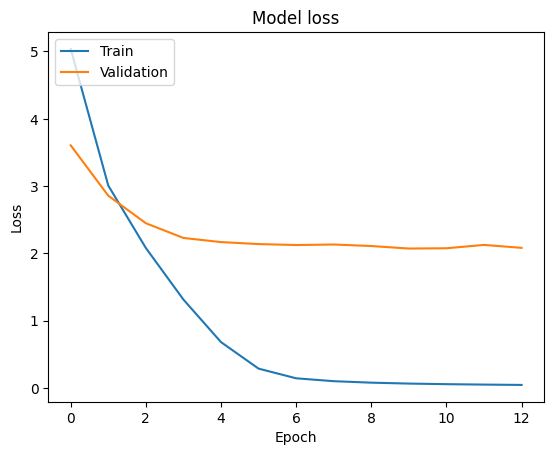

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

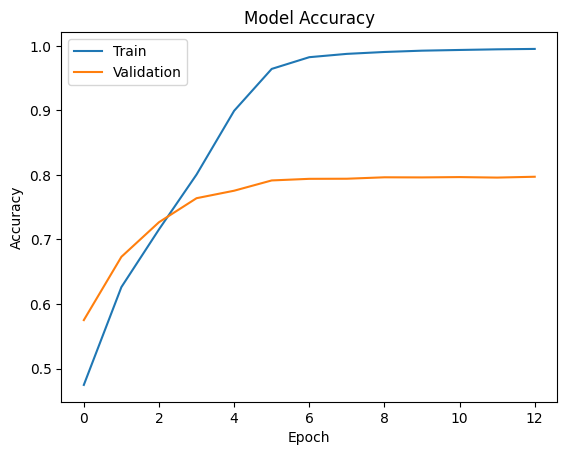

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [47]:
weights_file_path = '/kaggle/working/model_weights_main.weights.h5'

model.save_weights(weights_file_path)

print("Model weights saved successfully.")

Model weights saved successfully.


In [48]:
model = create_model(vocab_size_input, vocab_size_output, max_seq_length_input, max_seq_length_output, embedding_dim, hidden_units)
# Load the saved weights into the model
model.load_weights('/kaggle/working/model_weights.weights.h5')

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 10, 300)   │ 18,457,800 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 11, 300)   │ 18,716,100 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 300)   │      1,200 │ embedding_2[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 11, 300)   │      1,200 │ embedding_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ [(None, 1200),    │  4,324,800 │ batch_normalizat… │
│ (Bidirectional)     │ (None, 600),      │            │                   │
│                     │ (None, 600),      │            │                   │
│                     │ (None, 600),      │            │                   │
│                     │ (None, 600)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, 11, 600), │  2,162,400 │ batch_normalizat… │
│                     │ (None, 600),      │            │ bidirectional_1[… │
│                     │ (None, 600)]      │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 11, 600)   │      2,400 │ lstm_3[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 11, 62387) │ 37,494,587 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 81,160,487 (309.60 MB)

 Trainable params: 81,158,087 (309.59 MB)

 Non-trainable params: 2,400 (9.38 KB)

None


In [49]:
def decode_input(input_indices, tokenizer):
    # Convert token indices to words using the tokenizer, handling out-of-vocabulary indices
    words = [tokenizer.index_word.get(index, '<UNK>') for index in input_indices if index != 0]  # Exclude padding token
    # Join the words into a single sentence
    sentence = ' '.join(words)
    return sentence

In [50]:
def decode_prediction(prediction, tokenizer):
    # Get the index of the token with the highest probability for each time step
    token_indices = np.argmax(prediction, axis=-1)
    # Convert token indices to words using the tokenizer, handling out-of-vocabulary indices
    words = [tokenizer.index_word.get(index, '<UNK>') for index in token_indices if index != 0]  # Exclude padding token
    # Join the words into a single sentence
    sentence = ' '.join(words)
    return sentence

In [51]:
def remove_unk(sentences):
    return [sentence.replace('<UNK>', '').strip() for sentence in sentences]

In [52]:
data = pd.read_csv("/kaggle/input/hindi-sentence/data_sentence.csv")

In [53]:
data = data.dropna()

In [54]:
data['source_len'] = data['source'].apply(lambda x : len(x.split(" ")))

In [55]:
data = data[data['source_len'] < 5]

In [56]:
data.shape

(2733, 3)

In [57]:
data

,source,target,source_len
104,में परिवर्तन सामिल है,में परिवर्तन शामिल है,4
105,में परिवर्तन है,में परिवर्तन है,3
223,ये दिलली से हैं,ये दिल्ली से हैं,4
283,सैदपूर दूर्गा मंदिर,सैदपुर दुर्गा मंदिर,3
313,इसकी जलधारण क्समता है,इसकी जलधारण क्षमता है,4
...,...,...,...
378559,पूरूस और महिलाएं है,पुरूष और महिलाएं है,4
378560,साक्सरता दर है,साक्षरता दर है,3
378600,साँचा,साँचा,1
378906,यही सर्वप्ररथम वेद् है,यही सर्वप्रथम वेद है,4


In [58]:
data['source_token'] = data['source'].apply(do_tokenization)
data['target_token'] = data['target'].apply(do_tokenization)

In [59]:
data['source_token'] = data['source'].apply(do_stemming)
data['target_token'] = data['target'].apply(do_stemming)

In [60]:
data['target_token'] = add_special_tokens(data['target_token'])

In [61]:
data['source_int_token'] = tok.texts_to_sequences(data['source_token'])
data['target_int_token'] = tok_hindi.texts_to_sequences(data['target_token'])

In [62]:
data

,source,target,source_len,source_token,target_token,source_int_token,target_int_token
104,में परिवर्तन सामिल है,में परिवर्तन शामिल है,4,"[में, परिवर्तन, सामिल, है]","[<start>, में, परिवर्तन, शामिल, है, <end>]","[2, 615, 168, 1]","[62385, 2, 608, 165, 1, 62386]"
105,में परिवर्तन है,में परिवर्तन है,3,"[में, परिवर्तन, है]","[<start>, में, परिवर्तन, है, <end>]","[2, 615, 1]","[62385, 2, 608, 1, 62386]"
223,ये दिलली से हैं,ये दिल्ली से हैं,4,"[ये, दिलली, से, हैं]","[<start>, ये, दिल्ली, से, हैं, <end>]","[37, 140, 8, 5]","[62385, 37, 137, 8, 5, 62386]"
283,सैदपूर दूर्गा मंदिर,सैदपुर दुर्गा मंदिर,3,"[सैदपूर, दूर्गा, मंदिर]","[<start>, सैदपुर, दुर्गा, मंदिर, <end>]","[7555, 2181, 73]","[62385, 7573, 2186, 74, 62386]"
313,इसकी जलधारण क्समता है,इसकी जलधारण क्षमता है,4,"[इसकी, जलधारण, क्समता, है]","[<start>, इसकी, जलधारण, क्षमता, है, <end>]","[61, 14427, 710, 1]","[62385, 62, 14469, 701, 1, 62386]"
...,...,...,...,...,...,...,...
378559,पूरूस और महिलाएं है,पुरूष और महिलाएं है,4,"[पूरूस, और, महिलाएं, है]","[<start>, पुरूष, और, महिलाएं, है, <end>]","[336, 11, 2280, 1]","[62385, 3439, 11, 2284, 1, 62386]"
378560,साक्सरता दर है,साक्षरता दर है,3,"[साक्सरता, दर, है]","[<start>, साक्षरता, दर, है, <end>]","[763, 499, 1]","[62385, 754, 498, 1, 62386]"
378600,साँचा,साँचा,1,[साँचा],"[<start>, साँचा, <end>]",[1260],"[62385, 1249, 62386]"
378906,यही सर्वप्ररथम वेद् है,यही सर्वप्रथम वेद है,4,"[यही, सर्वप्ररथम, वेद्, है]","[<start>, यही, सर्वप्रथम, वेद, है, <end>]","[212, 855, 831, 1]","[62385, 209, 844, 816, 1, 62386]"


In [63]:
org = data['source_int_token']
pred = data['target_int_token']

In [64]:
org_main = pad_sequences(org, maxlen=max_length_combined_x, padding='post')
pred_main = pad_sequences(pred, maxlen=max_length_combined_y, padding='post')

In [65]:
# Perform prediction for the first 200 rows one sample at a time
batch_size = 200

# Initialize a list to store predictions
predictions = []

# Process in batches
for i in range(0, len(org_main), batch_size):
    # Define the batch range
    batch_x_test = org_main[i:i+batch_size]
    batch_y_test = pred_main[i:i+batch_size, :-1]  # Exclude last token from pred_main
    
    # Get predictions for the batch
    batch_predictions = model.predict([batch_x_test, batch_y_test])
    
    # Append batch predictions to the list
    predictions.append(batch_predictions)

# Concatenate all batch predictions into a single array
predictions = np.concatenate(predictions, axis=0)

# Optionally: If you need to process predictions further
# For example, reshaping or applying post-processing

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [66]:
def decode_prediction(prediction, tokenizer):
    # Get the index of the token with the highest probability for each time step
    token_indices = np.argmax(prediction, axis=-1)
    # Convert token indices to words using the tokenizer, handling out-of-vocabulary indices
    words = [tokenizer.index_word.get(index, '<UNK>') for index in token_indices if index != 0]  # Exclude padding token
    # Join the words into a single sentence
    sentence = ' '.join(words)
    return sentence

original = []  # List to store original sentences
model_predictions = []  # Renamed from 'prediction' to avoid conflict

# Decode each prediction and print the corresponding Hindi sentences
for i, pred in enumerate(predictions):  # Renamed loop variable to 'pred'
    decoded_pred_sentence = decode_prediction(pred, tok_hindi)
    decoded_input_sentence = decode_input(org_main[i], tok)
    original.append(decoded_input_sentence)
    model_predictions.append(decoded_pred_sentence)

In [67]:
def remove_unk(sentences):
    return [sentence.replace('<UNK>', '').strip() for sentence in sentences]
prediction = remove_unk(model_predictions)

In [68]:
data_test = data[['source', 'target']]

In [69]:
data_test['predicted'] = prediction

/tmp/ipykernel_23/2992921657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['predicted'] = prediction


In [70]:
data_test['exact_match'] = data_test['target'] == data_test['predicted']

/tmp/ipykernel_23/1379748154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['exact_match'] = data_test['target'] == data_test['predicted']


In [71]:
data_test.head()

,source,target,predicted,exact_match
104,में परिवर्तन सामिल है,में परिवर्तन शामिल है,में परिवर्तन शामिल है,False
105,में परिवर्तन है,में परिवर्तन है,में परिवर्तन है,False
223,ये दिलली से हैं,ये दिल्ली से हैं,ये दिल्ली से हैं,True
283,सैदपूर दूर्गा मंदिर,सैदपुर दुर्गा मंदिर,सैदपुर दुर्गा मंदिर,True
313,इसकी जलधारण क्समता है,इसकी जलधारण क्षमता है,इसकी क्षमता क्षमता है,False


In [72]:
# Assuming `data` is your DataFrame
accuracy = data_test['exact_match'].mean()  # This will give the percentage of True values in the 'exact_match' column
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.67%
